In [1]:
# Project 1
# Shuyao Wang 
# 9/24/2020

# Install the following Python packages: beautifulsoup4, requests, pandas, numpy
import sys
!{sys.executable} -m pip install lxml
import requests as rs
import numpy as np 
import pandas as pd
from bs4 import BeautifulSoup as bs

In [2]:
# Part 1: Data scraping and preparation
# Step 1: Scrape your competitor's data

# Use requests to get the URL
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:42.0) Gecko/20100101 Firefox/42.0'}
data = rs.get('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares', headers = headers)

# Use BeautifulSoup to read and parse the extracted data, as lxml
soup = bs(data.content, 'lxml')

# Use prettify() to view the content and find the appropriate table
soup.prettify()

# Use find() to save the aforementioned table as a variable
table = soup.find("table")

# Use pandas to read in the HTML file
df = pd.read_html(table.prettify())[0]

# Set reasonable names for the table columns
df.columns = ['rank', 'x_class', 'date', 'region', 'start-time', 'max-time', 'end-time', 'movie']

# Remove '+' sign from x_class
df['x_class'] = df['x_class'].str.replace('+','')

# Change range to 1-51
df.index = range(1,51)

# Print table
df

,rank,x_class,date,region,start-time,max-time,end-time,movie
1,1,X28,2003/11/04,486,19:29,19:53,20:06,Movie View archive
2,2,X20,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
3,3,X17.2,2003/10/28,486,09:51,11:10,11:24,Movie View archive
4,4,X17,2005/09/07,808,17:17,17:40,18:03,Movie View archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive
6,6,X10,2003/10/29,486,20:37,20:49,21:01,Movie View archive
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,Movie View archive
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,Movie View archive
9,9,X9,2006/12/05,930,10:18,10:35,10:45,Movie View archive
10,10,X8.3,2003/11/02,486,17:03,17:25,17:39,Movie View archive


In [3]:
# Step 2: Tidy the top 50 solar flare data

# Delete movie column
df = df.drop(['movie'], 1)

# Use datetime to combine the date with time columns into datetime columns
df['start_datetime'] = pd.to_datetime(df['date'] + ' ' + df['start-time'])
df['max_datetime'] = pd.to_datetime(df['date'] + ' ' + df['max-time'])
df['end_datetime'] = pd.to_datetime(df['date'] + ' ' + df['end-time'])

# Drop the extra columns
df = df.drop(['date',  'start-time', 'max-time', 'end-time'], 1)

# Reorder the columns
df = df[['rank', 'x_class', 'start_datetime', 'max_datetime', 'end_datetime', 'region']]

# Replace empty region code to NaN
df = df.replace('-', np.NaN)

# Print the tidy table
df

,rank,x_class,start_datetime,max_datetime,end_datetime,region
1,1,X28,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
2,2,X20,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
4,4,X17,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


In [4]:
# Step 3: Scrape the NASA data

# Use requests to get the URL
data = rs.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html')

# Use BeautifulSoup to read and parse the extracted data, as lxml
soup = bs(data.content, 'lxml')

# Split each line and only remain the necessay information
soup = soup.find('pre').get_text()
soup = soup.split("\n")
soup = soup[12:len(soup)-2]

# Import the data into frame
nasa = pd.DataFrame(soup)

# Split the data into multiple columns 
nasa = nasa[0].apply(lambda x: pd.Series(x.split()))

# Drop the extra column
nasa = nasa.drop([15, 16, 17, 18, 19, 20, 21, 22, 23], 1)

# Set reasonable names for the table columns
nasa.columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed','plot']

# Create new table copy the data from nasa without column 'plot'
nasa = nasa.drop('plot',1)

# Change range to 1-483
nasa.index = range(1,519)

# Print the table
pd.set_option("display.max_rows", None, "display.max_columns", None)
nasa

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
1,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
2,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
3,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
4,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
5,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
6,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227
7,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352
8,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785
9,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556
10,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441


In [5]:
# Step 4: Tidy the NASA the table 
import datetime as dt

# Replace uncertain element to 'NaN'
# Sorry, my English is not well, so I am not sure whether back should change to  NaN or not, I asked TA and he suggested me to set 
# it as NaN. Also the decription didn't mention how to deal with 'EP' and 'EP?' so I also set it as NaN
nasa = nasa.replace(['---','----', '-----', '------', '--/--', '--:--', 
               'FILA', 'DSF', 'EP', 'DIM', 'EP?','back', 'Back','BACK', 'Back?', '????'], np.NaN)

# 'is_halo' column: if find 'Halo' in 'cme_angle' cloumn then true else false 
nasa['is_halo'] = np.where(nasa['cme_angle'] == 'Halo', 'True', 'False')

# 'width_lower_bound' column: if appear '>' then true (gives lower bounds) else false (not gives lower bounds)
nasa['width_lower_bound'] = np.where(nasa['cme_width'].str.contains('>'), 'True', 'False')

# Replace 'Halo' to 'NaN' in cme_angle column
nasa['cme_angle'] = nasa['cme_angle'].replace('Halo', np.NaN ) 

# Remove any non-numeric part of the width column
nasa['cme_width'] =np.where(nasa['cme_width'].str.contains('>'), np.NaN, nasa['cme_width'])

# Combine date and time columns for start, end and cme
for i, row in nasa.iterrows():
    
    # Extract the year from start date 
    if pd.isnull( row['start_date']) == False:
        split_year = row['start_date'][:4]
    
    # Convert end_date to datetime object if the object is not a NaN object
    if  pd.isnull( row['end_date'])==False and  pd.isnull( row['end_time']) == False:
        
        # Format the data (if find '24:00' then replace '24:00' to '00:00' and add data to 1)
        if '24:00' in row['end_time']:
            row['end_time'] = row['end_time'].replace('24:00', '00:00')
            row['end_date'] =  pd.to_datetime(split_year + ' '+ row['end_date'] + ' ' + row['end_time']) + dt.timedelta(days=1)
        else: 
            row['end_date'] =  pd.to_datetime(split_year + ' '+ row['end_date'] + ' ' + row['end_time'])
            
    # Convert cme_date to datetime object if the object is not a NaN object
    if  pd.isnull( row['cme_date']) == False and  pd.isnull( row['cme_time']) == False:
        
        # Format the data (if find '24:00' then replace '24:00' to '00:00' and add data to 1)
        if '24:00' in row['cme_time']:
            row['cme_time'] = row['cme_time'].replace('24:00', '00:00')
            row['cme_date'] =  pd.to_datetime(split_year + ' '+ row['cme_date'] + ' ' + row['cme_time']) + dt.timedelta(days=1)
        else: 
            row['cme_date'] =  pd.to_datetime( split_year + ' ' + row['cme_date'] + ' ' + row['cme_time'])
        
    # Convert start_date to datetime object if the object is not a NaN object    
    if  pd.isnull( row['start_date']) == False and  pd.isnull( row['start_time']) == False:
        
         # Format the data (if find '24:00' then replace '24:00' to '00:00' and add data to 1)
        if '24:00' in row['start_time']:
            row['start_time'] = row['start_time'].replace('24:00', '00:00')
            row['start_date'] =  pd.to_datetime( row['start_date'] + ' ' + row['start_time']) + dt.timedelta(days=1)
        else: 
            row['start_date'] =  pd.to_datetime( row['start_date'] + ' ' + row['start_time'])

# Drop useless columns and rename the changed colunms.
nasa = nasa.drop(['start_time', 'end_time', 'cme_time'], 1)
nasa = nasa.rename(columns={'start_date' : 'start_datetime', 'end_date' : 'end_datetime', 'cme_date' : 'cme_datetime', 'cme_angle':'cpa', 'cme_width':'width', 'cme_speed':'speed', 'flare_classification':'importance'})

# Print the table
pd.set_option("display.max_rows", None, "display.max_columns", None)
nasa

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_halo,width_lower_bound
1,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
2,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,True,False
3,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,True,False
4,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
5,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
6,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,False,False
7,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,False,False
8,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360,785,True,False
9,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False
10,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,False,False


In [6]:
# Part 2
# Question 1: Replication

# In this question, I reordered the NASA table based on flare importance. I first made a duplite column
# to extract the X from the importance column, and then sorted the remain number in descending order.
# And the result shows that the NASA data are not same with SpaceWeatherLive table. The NASA data 
# range is from 1.9 to 28, while the SpaceWeatherLive data range is from 2.6 to 28. 

# Below is the code I wroten to compare with SpaceWeatherLive

# Copy the rows that have X class flare
top = nasa.loc[nasa['importance'].str.contains('X', na = False)].copy()

# Remove X from the column and cast the values to floats.
top['importance'] = top['importance'].str.lstrip('X')
top['importance'] = top['importance'].astype(float)

# Sort the data frame in descending order
top = top.sort_values('importance', ascending = False)

# Extract the top 50 result
top = top.head(50)

# Add 'X' back to the column
top['importance'] = top['importance'].astype(str)
top['importance'] = "X" + top['importance']

top

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_halo,width_lower_bound
241,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.0,2003-11-04 19:54:00,NaN,360,2657,True,False
118,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.0,2001-04-02 22:06:00,261,244,2505,False,False
234,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.0,2003-10-28 11:30:00,NaN,360,2459,True,False
127,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.0,2001-04-15 14:06:00,245,167,1199,False,False
235,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.0,2003-10-29 20:54:00,NaN,360,2029,True,False
9,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False
515,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,True,False
329,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,False,True
238,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,True,False
516,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,True,False


In [7]:
# Question 2: Integration

# This question is asking to write a function that finds the best matching row in the NASA data for
# each of the top 50 solar flares in the SpaceWeatherLive data. I decided use x_class and region 
# column to define whether the two flare in different table is similar (I compared two column is 
# because I found in X_class there are many same value, to prevent extract all of them, I decided compare
# one more column) 

# I printed out the common flare I found to check how the rest of the information
# match. And I found that even 

# Create a new column.
top['common50'] = np.NaN

# Iterate the two tables to check if there are common flare that appear in both table

# Compare df element and top50 element one by one 
for i, row_space in df.iterrows():  
    for j, row_top50 in top.iterrows():  
        
        # Check whether the region for both table is NAN
        if pd.isnull(row_top50['flare_region'])== False and  pd.isnull(row_space['region'])== False: 
            
            # Check if two flare are same in 'x_class' column and 'region' column
            if int(row_space['region']) == int(row_top50['flare_region']) and row_space['x_class'] == row_top50['importance']: 
                
                # Put the rank of flare in SWL table into the new column
                top.loc[j, 'common50'] = row_space['rank']

# Print the common flare
top[pd.isnull(top['common50']) == False]

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_halo,width_lower_bound,common50
9,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False,7.0
83,2000-07-14 10:30:00,2000-07-15 14:30:00,14000,80,N22W07,9077,X5.7,2000-07-14 10:54:00,NaN,360,1674,True,False,17.0
122,2001-04-06 19:35:00,2001-04-07 01:50:00,14000,230,S21E31,9415,X5.6,2001-04-06 19:30:00,NaN,360,1270,True,False,18.0
136,2001-08-25 16:50:00,2001-08-25 23:00:00,8000,170,S17E34,9591,X5.3,2001-08-25 16:50:00,NaN,360,1433,True,False,22.0
20,1998-05-06 08:25:00,1998-05-06 08:35:00,14000,5000,S11W65,8210,X2.7,1998-05-06 08:29:00,309,190,1099,False,False,48.0
143,2001-09-24 10:45:00,2001-09-25 20:00:00,7000,30,S16E23,9632,X2.6,2001-09-24 10:30:00,NaN,360,2402,True,False,50.0


Text(0, 0.5, 'Halo CMEs')

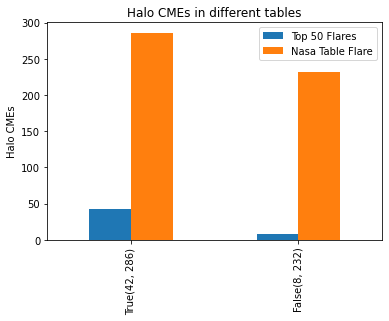

In [8]:
# Question 3

# The topic I choose to do is 'Do flares in the top 50 tend to have Halo CMEs? 
# You can make a barplot that compares the number (or proportion) of Halo CMEs 
# in the top 50 flares vs. the dataset as a whole'.

# I first use iterrows to truck the value of is_Halo column, and store them in 
# different variavle. And then I made a dataframe to form the data and use it to
# make graph. And then I add title and axis names into the graph 

# The result shows in below
# It turns out that the top 50 table tends to have Halo CMEs, with 84% (42/50) compared to 55.21% (286/518) in the NASA table. 
# Therefore I believe that the top 50 flares are more closely likely to having Halos than NASA table. So the correlation 
# between the top 50 flares and having halos is stronger based on my graph. 

import matplotlib.pyplot as plt

# Variable to store the True/False in is_Halo column 
true_count = 0 
false_count = 0 
top50_true = 0 
top50_false = 0

# Count the number of Halo CMEs in both tables
for i, j in nasa.iterrows():
    if (j['is_halo']) == 'True':
        true_count += 1
    else:
        false_count += 1

for i, j in top.iterrows():
    if (j['is_halo']) == 'True':
        top50_true += 1
    else:
        top50_false += 1       
        
# X-axis label that mark true/false column compare with two table, with exactly
# number of true/false appear 
count_T = 'True'+'('+ str(top50_true) +', '+ str(true_count)+')'
count_F = 'False'+'('+ str(top50_false) +', '+ str(false_count)+')'

# Create the dataframe of the Halos from the Top 50 and NASA Halo
halo = np.array([['','Top 50 Flares','Nasa Table Flare'],
                [count_T, top50_true,true_count],
                [count_F,top50_false,false_count]])

halo_graph = pd.DataFrame(data=halo[1:,1:],
                  index=halo[1:,0],
                  columns=halo[0,1:])


# Transform the the type to integer for graph 
halo_graph['Top 50 Flares'] = halo_graph['Top 50 Flares'].astype(int)
halo_graph['Nasa Table Flare'] = halo_graph['Nasa Table Flare'].astype(int)

# Add title and axis-name to graph 
halo_graph.plot.bar(title='Halo CMEs in different tables')
plt.ylabel("Halo CMEs")
